-> Opening file data/tempLog_prova.csv


<IPython.core.display.Javascript object>


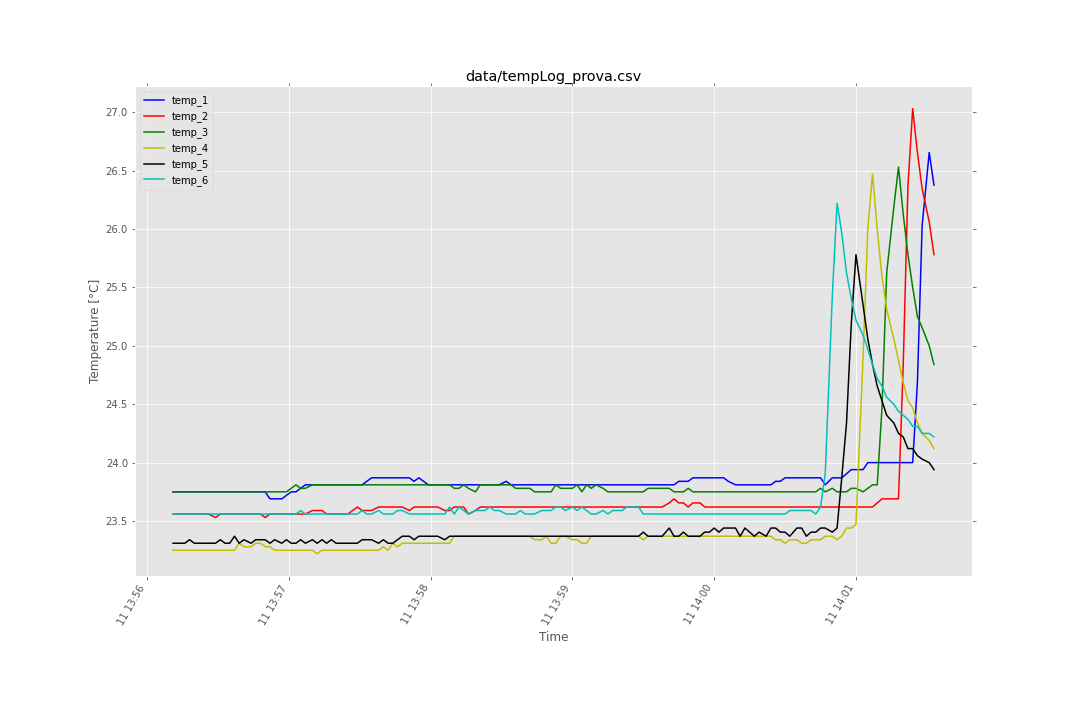

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.integrate as integrate
import scipy.io as io
import scipy.signal as sig
import scipy.ndimage as ndmg
import scipy.stats as stat
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import serial
import csv
import sys
import datetime as dt
from io import StringIO
import matplotlib.animation as animation

%matplotlib notebook


from Settings import *
matplotlib.style.use('ggplot')


if filePlot == 'LATEST':
    i=0
    while os.path.exists(f"{logFile}{i}.csv"):
        i += 1
    inFile = f"{logFile}{i}.csv"
else:
    inFile = f"{logFile}{filePlot}.csv"

print("-> Opening file " + inFile)

varNames = ["" for x in range(0, chanNo + 1)]
varNames[0] = "time"
for k in range(1, chanNo+1):
    varNames[k] = "temp_" + str(k)

'''
fp = open(inFile, 'r')

fig, ax = plt.subplots(figsize=(15, 10))
lines = [ax.plot([], [], '.')]*6
ax.margins(0.05)

def animate(i):
    while True:
        new = fp.readline()
        if i==0: return

        if new and "##" not in new:

            df = pd.read_csv(StringIO(new), names = varNames, header = None, sep = separator)
            df['time'] = [dt.datetime.strptime(datestr, timeTagFormat) for datestr in df['time']]
            df.index = df['time']

            df.replace(errorCode, np.NaN, inplace=True)
            df.fillna(method='ffill', inplace=True)
            
            plotObj = df[varNames[1:]].plot(
                rot=60, ax=ax, marker='.', color=['b', 'r', 'g', 'y', 'k', 'c'], 
                legend=(i==1)
            )
            
            plotObj.set_title(inFile)
            plotObj.set_ylabel("Temperature [°C]")
            plotObj.set_xlabel("Time")
            plotObj.set_ylim(yLimits)
            plot
            break
        
    ax.relim()
    ax.autoscale()
'''


fig, ax = plt.subplots(figsize=(15, 10))
lines = [ax.plot([], [], '.')]*6
ax.margins(0.05)

def animate(i):
    ax.cla()
    fp = open(inFile, 'r')
    n = len(fp.readlines())
    df = pd.read_csv(inFile, names = varNames, header = None, sep = separator, skiprows=n-samplestodisplay)
    df['time'] = [dt.datetime.strptime(datestr, timeTagFormat) for datestr in df['time']]
    df.index = df['time']
    #ax.text(df.index.iloc[0], len(df))

    df.replace(errorCode, np.NaN, inplace=True)
    df.fillna(method='ffill', inplace=True)

    plotObj = df[varNames[1:]].plot(
        rot=60, ax=ax, color=['b', 'r', 'g', 'y', 'k', 'c']
    )

    plotObj.set_title(inFile)
    plotObj.set_ylabel("Temperature [°C]")
    plotObj.set_xlabel("Time")
    plotObj.set_ylim(yLimits)
        
    ax.relim()
    ax.autoscale()


anim = animation.FuncAnimation(fig, animate, interval=2000, blit = False)

plt.show()